In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
manhattan_test_df = pd.read_csv(rf"Manhattan_plot_Sp_aurata_Popoolation_dataset.csv", sep=",")
manhattan_test_df

,Unnamed: 0,CHR,BP,P_fet,i,colors
0,0,21,24,0.576,0,1
1,1,21,45,1.414,1,1
2,2,21,51,1.067,2,1
3,3,21,55,1.398,3,1
4,4,21,63,0.340,4,1
...,...,...,...,...,...,...
5300770,5300770,44,22260474,1.887,5300770,0
5300771,5300771,44,22260486,0.423,5300771,0
5300772,5300772,44,22260505,0.044,5300772,0
5300773,5300773,44,22260506,0.143,5300773,0


In [2]:
Popoolation_labrax_result=pd.read_csv(rf"merged_Sparus_popoolation_results.csv", sep=",")
Popoolation_labrax_result

,Fst,index1,1,0,FET_AVG_BHcor
0,0.009029,0,24,21,0.576
1,0.011142,1,45,21,1.414
2,0.007816,2,51,21,1.067
3,0.007468,3,55,21,1.398
4,0.006778,4,63,21,0.340
...,...,...,...,...,...
5300770,0.026319,174390,22260474,44,1.887
5300771,0.016732,174391,22260486,44,0.423
5300772,0.011063,174392,22260505,44,0.044
5300773,0.015679,174393,22260506,44,0.143


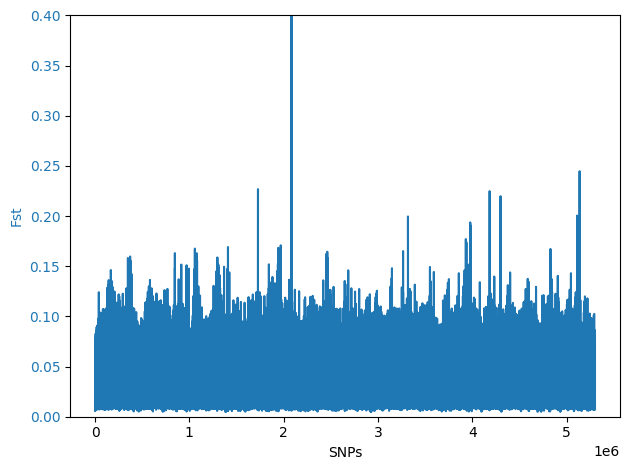

<Figure size 2000x2000 with 0 Axes>

In [7]:
data1 = Popoolation_labrax_result["Fst"]
data2 = Popoolation_labrax_result["FET_AVG_BHcor"]
# data3? = Popoolation_labrax_result["CMH_BHcor"]

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('SNPs')
ax1.set_ylabel('Fst', color=color)
ax1.plot(data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.ylim(0,0.4)

# ax2 = ax1.twinx()

# color = 'tab:orange'
# ax2.set_ylabel('FET_AVG_BHcor', color=color) 
# ax2.plot(data2, color=color)
# plt.axhline(3, color = 'red',linestyle='dashed' )
# ax2.tick_params(axis='y', labelcolor=color)
# plt.ylim(0,)

plt.figure(figsize=(20, 20))
fig.tight_layout() 
plt.show()

In [4]:
# ============= create the MANHATTAN PLOT ============= #

# build the dataframe to be used for the construction of the manhattan plot
manhattan_df1 = pd.DataFrame()
manhattan_df1["CHR"] = Popoolation_labrax_result["0"]
manhattan_df1["BP"] = Popoolation_labrax_result["1"]
manhattan_df1["P_fet"] = Popoolation_labrax_result["FET_AVG_BHcor"]
# manhattan_df1["P_cmh"] = Popoolation_labrax_result["CMH_BHcor"]
manhattan_df1['i'] = manhattan_df1.index


manhattan_df2 = manhattan_df1['CHR']
manhattan_df2 = pd.DataFrame(data=manhattan_df2)
# Map to alternate 1 and 0 using the dictionary
mapping = {'21': 1, '22': 0, '23': 1, '24': 0, '25': 1,
            '26': 0, '27': 1, '28': 0, '29': 1, '30': 0,
            '31': 1, '32': 0, '33': 1, '34': 0, '35': 1,
            '36': 0, '37': 1, '38': 0, '39': 1, '40': 0,
            '41': 1, '42': 0, '43': 1, '44': 0}

# Ensure CHR is a string to match mapping keys
manhattan_df2['CHR'] = manhattan_df2['CHR'].astype(str)

# Apply mapping using map
manhattan_df2['colors'] = manhattan_df2['CHR'].map(mapping)

# Add the colors column back to the main DataFrame
manhattan_df1['colors'] = manhattan_df2['colors']

manhattan_df1






,CHR,BP,P_fet,i,colors
0,21,24,0.576,0,1
1,21,45,1.414,1,1
2,21,51,1.067,2,1
3,21,55,1.398,3,1
4,21,63,0.340,4,1
...,...,...,...,...,...
5300770,44,22260474,1.887,5300770,0
5300771,44,22260486,0.423,5300771,0
5300772,44,22260505,0.044,5300772,0
5300773,44,22260506,0.143,5300773,0


In [5]:
manhattan_df1.to_csv(r"Manhattan_plot_Sp_aurata_Popoolation_dataset.csv")

c:\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seabo

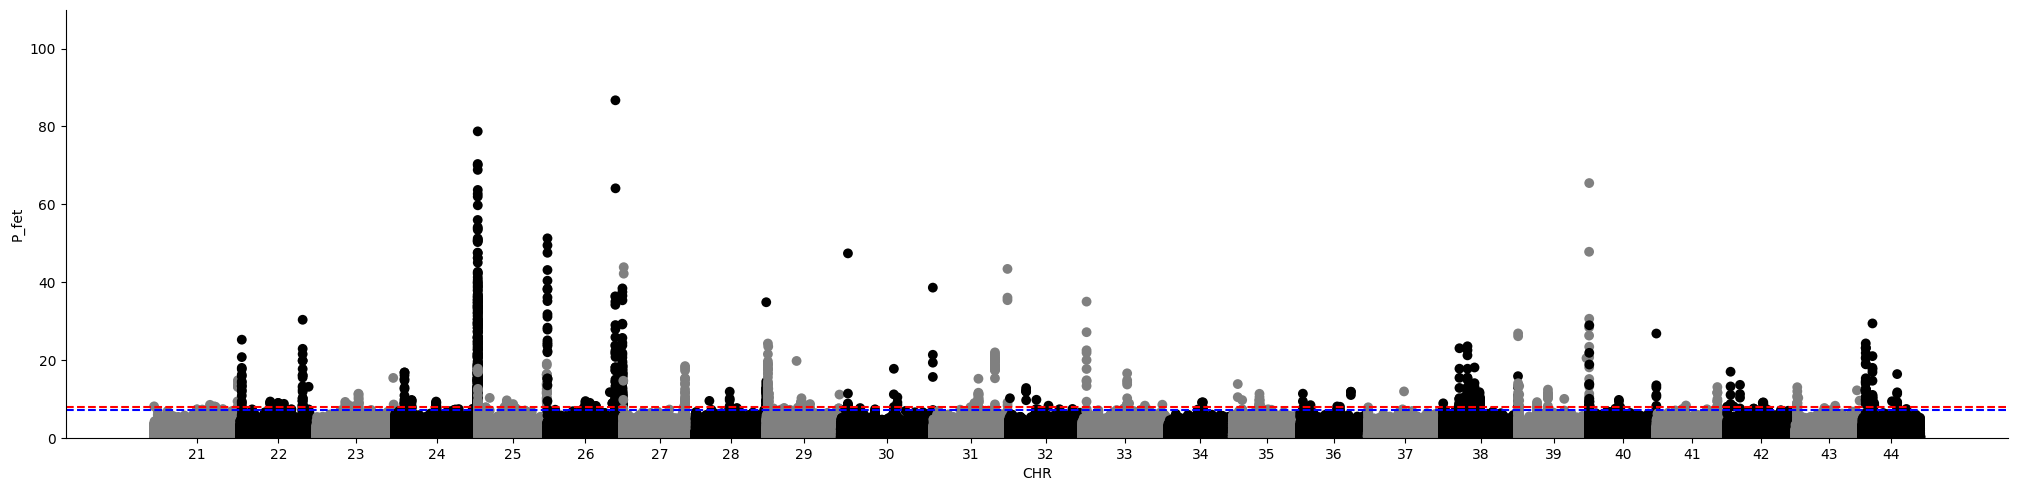

In [8]:
# Generate Manhattan plot: 
plot = sns.relplot(data=manhattan_df1, x='i', y='P_fet', hue='colors', palette = ["black", "gray"], 
                    legend=None ,aspect=4,linewidth=0, s=50)
chrom_df= manhattan_df1.groupby('CHR')['i'].median()

plot.ax.set_xlabel('CHR'); plot.ax.set_xticks(chrom_df);
plot.ax.set_xticklabels(chrom_df.index)

plt.axhline(7, color = 'blue',linestyle='dashed')
plt.axhline(8, color = 'red',linestyle='dashed')
plt.ylim(0,110)

plt.savefig('FET_corrected_pvalues_manhattan_plot_Popoolation.jpeg', dpi=500)